In [49]:
# import pandas
import pandas as pd
import matplotlib.pyplot as plt

# creating dataframes

book_file = 'Books.csv'
user_file = 'Users.csv'
rating_file = 'Ratings.csv'

books = pd.read_csv(book_file)
users = pd.read_csv(user_file)
ratings = pd.read_csv(rating_file)

/var/folders/0j/mkwr2_rj6dxcwf28md743d9h0000gn/T/ipykernel_56256/1367346766.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(book_file)


In [50]:
# dropping image columns
books_df = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1)
# locating null (NaN) values
books_df.loc[books_df.isnull().any(axis = 1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [51]:
# filling NaN values
books_df.loc[128890, 'Publisher']= 'NovelBooks, Inc.'
books_df.loc[129037, 'Publisher']= 'CreateSpace Independent Publishing Platform'
books_df.loc[187689, 'Book-Author']= 'Larissa Anne Downes'


In [52]:
# dropping NaN values (no author for a book means we can't fill it)
main_books = books_df.drop(index=118033)
main_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [53]:
check_book = books_df[books_df.isnull().any(axis = 1)]
check_book
# we can see here that we now have no null (NaN) values

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley


In [54]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [55]:
user_df = users.dropna()
user_df

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0
...,...,...,...
278848,278849,"georgetown, ontario, canada",23.0
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0


In [56]:
user_df.drop(["Age"], axis = 1, inplace = True)
user_df

/var/folders/0j/mkwr2_rj6dxcwf28md743d9h0000gn/T/ipykernel_56256/46230553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df.drop(["Age"], axis = 1, inplace = True)


,User-ID,Location
1,2,"stockton, california, usa"
3,4,"porto, v.n.gaia, portugal"
5,6,"santa monica, california, usa"
9,10,"albacete, wisconsin, spain"
10,11,"melbourne, victoria, australia"
...,...,...
278848,278849,"georgetown, ontario, canada"
278850,278851,"dallas, texas, usa"
278851,278852,"brisbane, queensland, australia"
278852,278853,"stranraer, n/a, united kingdom"


In [57]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [58]:
# next we can check for null (NaN) values
rating_df = ratings.loc[ratings.isnull().any(axis = 1)]
rating_df

,User-ID,ISBN,Book-Rating


In [88]:
# we can use the groupby function to see how many books there are
main_books = books_df.groupby("Book-Author").size().reset_index(name="Number of Books").sort_values(by="Number of Books", ascending=False).head(50)
main_books

,Book-Author,Number of Books
1088,Agatha Christie,632
100924,William Shakespeare,567
91189,Stephen King,524
4567,Ann M. Martin,423
13497,Carolyn Keene,373
30559,Francine Pascal,372
40000,Isaac Asimov,330
73343,Nora Roberts,315
7311,Barbara Cartland,307
14422,Charles Dickens,302


<Axes: xlabel='Book-Author'>

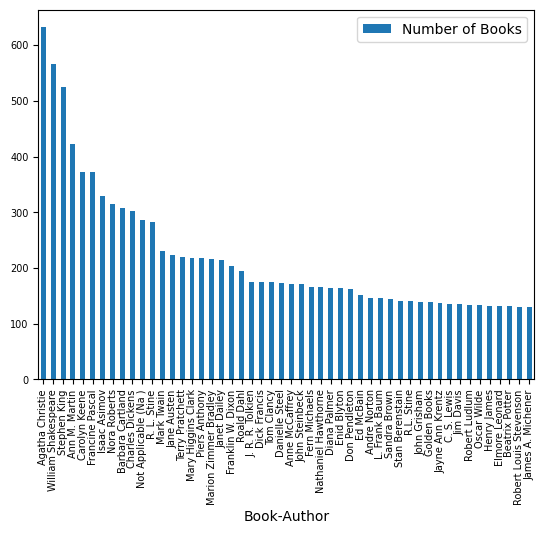

In [89]:
# Let's see who has written the most books
main_books.plot.bar(x='Book-Author', y='Number of Books', rot=90, fontsize=7)

In [61]:
# we can use the groupby function to see how many ratings there are
rating_df = ratings.groupby("Book-Rating").size().reset_index(name="Number of Ratings")
rating_df

,Book-Rating,Number of Ratings
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


In [62]:
Locations = users.groupby("Location").size().reset_index(name='UserCount')
Locations_df = Locations.sort_values(by='UserCount', ascending=False)
Locations_df

,Location,UserCount
29056,"london, england, united kingdom",2506
51109,"toronto, ontario, canada",2250
49594,"sydney, new south wales, australia",1744
31659,"melbourne, victoria, australia",1708
40494,"portland, oregon, usa",1629
...,...,...
23098,"huonville, tasmania, australia",1
23099,"huonville, tennessee, australia",1
23100,"hur, egy, egypt",1
23102,"hurley, new mexico, usa",1


<Axes: xlabel='Location'>

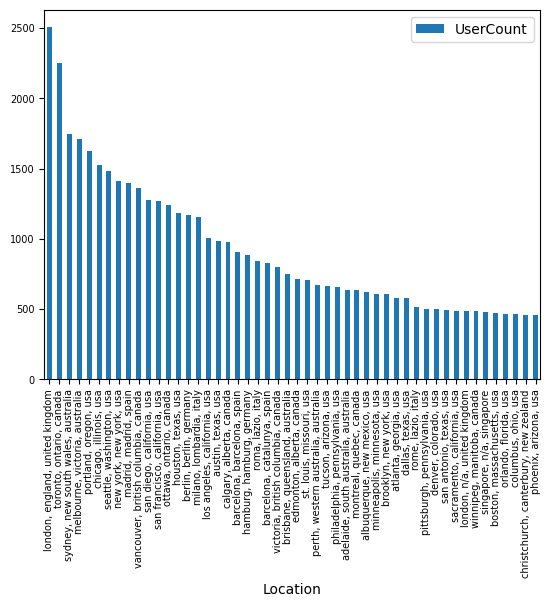

In [63]:
#Let's see where the ratings are coming from
Locations_df.head(50).plot.bar(x='Location', y='UserCount', fontsize=7)

In [64]:
merge = pd.merge(books, ratings, on='ISBN')
merging_df = merge.groupby('ISBN').agg({ 'Book-Rating': ['count', 'mean']}).reset_index()
merging_df.columns = ['ISBN', 'Number of Ratings', 'Average Rating']
book_ratings =  pd.merge(books, merging_df, on='ISBN')
book_ratings['Average Rating'] = book_ratings['Average Rating'].round(1)
book_ratings


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Number of Ratings,Average Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14,4.9
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3,5.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11,4.3
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1,0.0
...,...,...,...,...,...,...,...,...,...,...
270146,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1,7.0
270147,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1,4.0
270148,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,1,0.0
270149,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1,0.0


In [65]:
adjusted_book_ratings = book_ratings[book_ratings['Number of Ratings'] >= 100]
adjusted_book_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Number of Ratings,Average Rating
18,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,422,3.1
19,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,180,3.4
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,2502,1.0
27,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,207,2.8
28,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,407,3.8
...,...,...,...,...,...,...,...,...,...,...
28060,0425178765,Easy Prey,John Sandford,2001,Berkley Publishing Group,http://images.amazon.com/images/P/0425178765.0...,http://images.amazon.com/images/P/0425178765.0...,http://images.amazon.com/images/P/0425178765.0...,113,2.8
29203,0449223604,M Is for Malice,Sue Grafton,1998,Fawcett Books,http://images.amazon.com/images/P/0449223604.0...,http://images.amazon.com/images/P/0449223604.0...,http://images.amazon.com/images/P/0449223604.0...,151,2.3
30523,0345444884,The Talisman,STEPHEN KING,2001,Ballantine Books,http://images.amazon.com/images/P/0345444884.0...,http://images.amazon.com/images/P/0345444884.0...,http://images.amazon.com/images/P/0345444884.0...,103,4.1
30763,0060008032,Angels,Marian Keyes,2003,HarperTorch,http://images.amazon.com/images/P/0060008032.0...,http://images.amazon.com/images/P/0060008032.0...,http://images.amazon.com/images/P/0060008032.0...,104,2.4


In [97]:
merging = pd.merge(users, ratings, on='User-ID')
merging_df2 = merging.groupby('User-ID').agg({ 'Book-Rating': ['count', 'mean']}).reset_index()
merging_df2.columns = ['User-ID', 'Number of Ratings', 'Average Rating']
user_ratings =  pd.merge(users, merging_df2, on='User-ID')
user_ratings.round(1)

,User-ID,Location,Age,Number of Ratings,Average Rating
0,2,"stockton, california, usa",18.0,1,0.0
1,7,"washington, dc, usa",NaN,1,0.0
2,8,"timmins, ontario, canada",NaN,18,2.2
3,9,"germantown, tennessee, usa",NaN,3,2.0
4,10,"albacete, wisconsin, spain",26.0,2,3.0
...,...,...,...,...,...
105278,278846,"toronto, ontario, canada",23.0,2,4.0
105279,278849,"georgetown, ontario, canada",23.0,4,2.2
105280,278851,"dallas, texas, usa",33.0,23,4.0
105281,278852,"brisbane, queensland, australia",32.0,1,8.0


In [67]:
# Removing Biases
minimum_threshold = 100
default_rating = 5.0
book_ratings['Weighted Rating'] = (book_ratings['Average Rating'] * book_ratings['Number of Ratings'] + minimum_threshold * default_rating) / (book_ratings['Number of Ratings'] + minimum_threshold)
book_ratings = book_ratings.sort_values(by='Weighted Rating', ascending=False)
book_ratings.round(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Number of Ratings,Average Rating,Weighted Rating
3024,1844262553,Free,Paul Vincent,2003,Upfront Publishing,http://images.amazon.com/images/P/1844262553.0...,http://images.amazon.com/images/P/1844262553.0...,http://images.amazon.com/images/P/1844262553.0...,54,8.0,6.1
5427,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,170,6.6,6.0
3834,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,197,6.5,6.0
5426,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,194,6.5,6.0
2805,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,168,6.4,5.9
...,...,...,...,...,...,...,...,...,...,...,...
7888,0425147363,Tom Clancy's Op-Center (Tom Clancy's Op Center...,Tom Clancy,1995,Berkley Publishing Group,http://images.amazon.com/images/P/0425147363.0...,http://images.amazon.com/images/P/0425147363.0...,http://images.amazon.com/images/P/0425147363.0...,134,1.4,2.9
47,0425182908,Isle of Dogs,Patricia Cornwell,2002,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,203,1.9,2.9
2441,0440214041,The Pelican Brief,John Grisham,1993,Dell,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,523,2.5,2.9
1431,0140244824,Songs in Ordinary Time (Oprah's Book Club (Pap...,Mary McGarry Morris,1996,Penguin Books,http://images.amazon.com/images/P/0140244824.0...,http://images.amazon.com/images/P/0140244824.0...,http://images.amazon.com/images/P/0140244824.0...,232,1.9,2.8


In [68]:
active_users = book_ratings[book_ratings['Number of Ratings'] >= 50]
popular_books = user_ratings[user_ratings['Number of Ratings'] >= 200]

filtered_books = ratings[(ratings['ISBN'].isin(active_users['ISBN'])) &(ratings['User-ID'].isin(popular_books['User-ID']))]

filtered_df = pd.merge(filtered_books,books, on='ISBN')
pivot_table = filtered_df.pivot_table(index='Book-Title',columns='User-ID', values='Book-Rating')
pivot_table.fillna(0, inplace=True)
pivot_table


User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
from sklearn.metrics.pairwise import cosine_similarity

#finding cosine similarities
similarities = cosine_similarity(pivot_table)
similarities

array([[1.        , 0.        , 0.0543456 , ..., 0.        , 0.08924832,
        0.        ],
       [0.        , 1.        , 0.08846431, ..., 0.        , 0.        ,
        0.        ],
       [0.0543456 , 0.08846431, 1.        , ..., 0.1241088 , 0.14009737,
        0.09078407],
       ...,
       [0.        , 0.        , 0.1241088 , ..., 1.        , 0.11003213,
        0.12271145],
       [0.08924832, 0.        , 0.14009737, ..., 0.11003213, 1.        ,
        0.03274109],
       [0.        , 0.        , 0.09078407, ..., 0.12271145, 0.03274109,
        1.        ]])

In [80]:
# This finds the book in the index and tells us what row it is in
index = pivot_table.index.get_loc("Zoya")
index

1961

In [71]:
# Gives us a tuple, first number tells us the row of the book, second number is the cosine similarity!
similarity_list = sorted(list(enumerate(similarities[index])), key=lambda x: x[1], reverse=True)[1:11]
similarity_list

[(1158, 0.6763515778262185),
 (635, 0.6230288304137823),
 (1677, 0.5911821240063588),
 (525, 0.5865115251599663),
 (753, 0.5724717439944823),
 (1301, 0.527092033197546),
 (1234, 0.5066710044155938),
 (1342, 0.49240749100920395),
 (720, 0.48789473371870135),
 (1245, 0.48635813609339007)]

In [84]:
def recommend_me(book_name):
    print(f'Checking for book: "{book_name}"')
    if book_name in pivot_table.index:
        index = pivot_table.index.get_loc(book_name)
        similarity_list = sorted(list(enumerate(similarities[index])), key=lambda x: x[1], reverse=True)[1:11]
        print(f'Recommendations for the book "{book_name}":')
        print('-----------')
        for book in similarity_list:
            print(pivot_table.index[book[0]])
    else:
        print(f'Book Not Found: "{book_name}"')

In [85]:

recommend_me('The Outsiders')

Checking for book: "The Outsiders"
Recommendations for the book "The Outsiders":
-----------
Forbidden Fruit
The Quiet Game
Blood and Gold (Rice, Anne, Vampire Chronicles.)
Cryptonomicon
Fortune's Hand
Free
Montana
MÃ?Â¶rder ohne Gesicht.
Reversible Errors
It's Not About the Bike: My Journey Back to Life


In [99]:
# Group by Author and User-ID, and compute the mean rating
author_user_ratings = filtered_df.groupby(['Book-Author', 'User-ID'])['Book-Rating'].mean().reset_index()

# Create pivot table with authors as rows and user IDs as columns
pivot_table_2 = author_user_ratings.pivot_table(index='Book-Author', columns='User-ID', values='Book-Rating')
pivot_table_2.fillna(0, inplace=True)
pivot_table_2

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Author,,,,,,,,,,,,,,,,,,,,,
A. Manette Ansay,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.S. BYATT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALBERT CAMUS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALEX HALEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALEXANDER MCCALL SMITH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winston Groom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wladimir Kaminer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yann Martel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
similarities_2 = cosine_similarity(pivot_table_2)
similarities_2

array([[1.        , 0.        , 0.        , ..., 0.07103213, 0.        ,
        0.04614612],
       [0.        , 1.        , 0.19210557, ..., 0.1343125 , 0.12545983,
        0.        ],
       [0.        , 0.19210557, 1.        , ..., 0.04524249, 0.        ,
        0.        ],
       ...,
       [0.07103213, 0.1343125 , 0.04524249, ..., 1.        , 0.09615039,
        0.09488334],
       [0.        , 0.12545983, 0.        , ..., 0.09615039, 1.        ,
        0.02492704],
       [0.04614612, 0.        , 0.        , ..., 0.09488334, 0.02492704,
        1.        ]])

In [111]:
def recommend_similar_authors_to(author_name):
    print(f'Checking for author: "{author_name}"')
    if author_name in pivot_table_2.index:
        index_2 = pivot_table_2.index.get_loc(author_name)
        similarity_list_2 = sorted(list(enumerate(similarities_2[index_2])), key=lambda x: x[1], reverse=True)[1:11]
        print(f'Recommendations for the author "{author_name}":')
        print('-----------')
        for author in similarity_list_2:
            print(pivot_table_2.index[author[0]])
    else:
        print(f'Author Not Found: "{author_name}"')

In [112]:
recommend_similar_authors_to('Stephen King')

Checking for author: "Stephen King"
Recommendations for the author "Stephen King":
-----------
Dean R. Koontz
James Patterson
JOHN GRISHAM
Thomas Harris
Michael Crichton
Anne Rice
John Grisham
Robin Cook
Mary Higgins Clark
STEPHEN KING
